<a href="https://colab.research.google.com/github/dioallan/testecolab/blob/main/T4_Atividade_de_aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import das bibliotecas do Pandas, Matplotlib e Seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Import das duas bases baixadas do site Gapminder
Desemprego = pd.read_csv('https://raw.githubusercontent.com/dioallan/testecolab/main/desemprego.csv')
Inflacao = pd.read_csv('https://raw.githubusercontent.com/dioallan/testecolab/main/inflacao.csv')

In [4]:
#Criando novos datasets com algumas colunas, no exercicío irei trabalhar somente de 2015 até 2019, ultimo ano da base
Desem = Desemprego[["country","2015","2016","2017","2018","2019"]]
Infl = Inflacao[["country","2015","2016","2017","2018","2019"]]

In [5]:
#Rename das colunas do dataset de Desemprego
Desem = Desem.rename(columns={'country':'Pais','2015':'Desemp2015','2016':'Desemp2016','2017':'Desemp2017','2018':'Desemp2018',
                             '2019':'Desemp2019'})

In [6]:
#Rename das colunas do dataset de Inflação

Infl = Infl.rename(columns={'country':'Pais','2015':'Infla2015','2016':'Infla2016','2017':'Infla2017','2018':'Infla2018',
                             '2019':'Infla2019'})

In [7]:
#Replace do caracter '−' presente na base de inflação para números 
#negativos, que acaba sendo interpretado como string e não deixando fazer a conversão para float, nessa coloco o 
#sinal correto para ser de fato um número negativo '-'
Infl['Infla2015'] = Infl['Infla2015'].str.replace('−', '-')
Infl['Infla2016'] = Infl['Infla2016'].str.replace('−', '-')
Infl['Infla2017'] = Infl['Infla2017'].str.replace('−', '-')
Infl['Infla2018'] = Infl['Infla2018'].str.replace('−', '-')
Infl['Infla2019'] = Infl['Infla2019'].str.replace('−', '-')

In [8]:
#Conversão dos valores antes String da base de inflação para float
Infl['Infla2015'] = Infl['Infla2015'].astype(float)
Infl['Infla2016'] = Infl['Infla2016'].astype(float)
Infl['Infla2017'] = Infl['Infla2017'].astype(float)
Infl['Infla2018'] = Infl['Infla2018'].astype(float)
Infl['Infla2019'] = Infl['Infla2019'].astype(float)

In [9]:
#Substituindo os valores nulos presentes na base de inflação por 0
Infl['Infla2015'] = Infl['Infla2015'].fillna(0)
Infl['Infla2016'] = Infl['Infla2016'].fillna(0)
Infl['Infla2017'] = Infl['Infla2017'].fillna(0)
Infl['Infla2018'] = Infl['Infla2018'].fillna(0)
Infl['Infla2019'] = Infl['Infla2019'].fillna(0)

In [10]:
#Substituindo os valores nulos presentes na base de Deseprego por 0
Desem['Desemp2015'] = Desem['Desemp2015'].fillna(0)
Desem['Desemp2016'] = Desem['Desemp2016'].fillna(0)
Desem['Desemp2017'] = Desem['Desemp2017'].fillna(0)
Desem['Desemp2018'] = Desem['Desemp2018'].fillna(0)
Desem['Desemp2019'] = Desem['Desemp2019'].fillna(0)

In [11]:
# Criando um dataset final através de um merge usando como referência a variável "Pais"
Tabfinal = Desem.merge(Infl, how='left', on='Pais')

In [12]:
#Criando um dataset ordenado pelos paises com maiores inflação em 2015 e indexando a váriavel "Pais"
MaiorInflacao2015 = Tabfinal.nlargest(8, 'Infla2015')
MaiorInfla2015 = MaiorInflacao2015[["Pais","Infla2015","Infla2016", "Infla2017", "Infla2018", "Infla2019"]]
MaiorInfla2015.set_index('Pais', inplace = True)

In [13]:
#Criando um dataset ordenado pelos paises com maiores taxas de desemprego em 2015 e indexando a váriavel "Pais"
MaiorDesemprego2015 = Tabfinal.nlargest(8, 'Desemp2015')
MaiorDesemp2015 = MaiorDesemprego2015[["Pais","Desemp2015","Desemp2016", "Desemp2017", "Desemp2018", "Desemp2019"]]
MaiorDesemp2015.set_index('Pais', inplace = True)

In [32]:
#Exibição do Dataset com ordenado pela maior inflação de 2015
MaiorInfla2015

,Infla2015,Infla2016,Infla2017,Infla2018,Infla2019
Pais,,,,,
Argentina,41.1,26.000,42.00,50.90,39.90
Syria,37.0,37.000,13.60,19.70,0.00
Togo,37.0,-0.435,1.34,1.55,1.28
Nauru,27.2,12.300,4.00,3.75,1.84
Suriname,24.1,28.100,5.66,4.42,44.90
Angola,21.8,22.600,29.10,28.10,9.39
Sudan,20.7,34.600,56.00,52.00,115.00
Malawi,19.5,61.000,6.13,7.73,10.20


In [33]:
#Exibição do Dataset com ordenado pelo maior Desemprego de 2015
MaiorDesemp2015

,Desemp2015,Desemp2016,Desemp2017,Desemp2018,Desemp2019
Pais,,,,,
Kosovo,24.4,28.6,27.3,23.3,24.0
South Africa,24.1,25.0,25.0,26.5,27.6
Bosnia and Herzegovina,23.8,19.7,17.8,15.9,14.7
Greece,22.8,20.7,18.9,17.1,16.2
North Macedonia,22.2,20.7,18.9,16.5,16.2
Reunion,20.8,0.0,0.0,0.0,0.0
Namibia,20.3,0.0,18.8,0.0,0.0
Palestine,20.1,21.3,22.6,22.4,23.1


In [34]:
#Criando um dataset ordenado pelos paises com maiores inflação em 2016 e indexando a váriavel "Pais"
MaiorInflacao2016 = Tabfinal.nlargest(8, 'Infla2016')
MaiorInfla2016 = MaiorInflacao2016[["Pais","Infla2015","Infla2016", "Infla2017", "Infla2018", "Infla2019"]]
MaiorInfla2016.set_index('Pais', inplace = True)

In [35]:
#Criando um dataset ordenado pelos paises com maiores taxas de desemprego em 2016 e indexando a váriavel "Pais"
MaiorDesemprego2016 = Tabfinal.nlargest(8, 'Desemp2016')
MaiorDesemp2016 = MaiorDesemprego2016[["Pais","Desemp2015","Desemp2016", "Desemp2017", "Desemp2018", "Desemp2019"]]
MaiorDesemp2016.set_index('Pais', inplace = True)

In [36]:
#Exibição do Dataset com ordenado pela maior inflação de 2016
MaiorInfla2016

,Infla2015,Infla2016,Infla2017,Infla2018,Infla2019
Pais,,,,,
Malawi,19.50,61.0,6.13,7.73,10.20
"Congo, Dem. Rep.",4.35,43.1,29.80,4.01,6.74
Syria,37.00,37.0,13.60,19.70,0.00
Sudan,20.70,34.6,56.00,52.00,115.00
Suriname,24.10,28.1,5.66,4.42,44.90
Argentina,41.10,26.0,42.00,50.90,39.90
Egypt,6.25,22.9,21.40,13.60,6.22
Angola,21.80,22.6,29.10,28.10,9.39


In [37]:
#Exibição do Dataset com ordenado pelo maior Desemprego de 2016
MaiorDesemp2016

,Desemp2015,Desemp2016,Desemp2017,Desemp2018,Desemp2019
Pais,,,,,
Kosovo,24.4,28.6,27.3,23.3,24.0
South Africa,24.1,25.0,25.0,26.5,27.6
Palestine,20.1,21.3,22.6,22.4,23.1
Greece,22.8,20.7,18.9,17.1,16.2
North Macedonia,22.2,20.7,18.9,16.5,16.2
Bosnia and Herzegovina,23.8,19.7,17.8,15.9,14.7
Djibouti,0.0,19.6,0.0,0.0,0.0
Armenia,16.8,17.4,18.4,17.8,0.0


In [18]:
#Criando um dataset ordenado pelos paises com maiores inflação em 2017 e indexando a váriavel "Pais"
MaiorInflacao2017 = Tabfinal.nlargest(8, 'Infla2017')
MaiorInfla2017 = MaiorInflacao2017[["Pais","Infla2015","Infla2016", "Infla2017", "Infla2018", "Infla2019"]]
MaiorInfla2017.set_index('Pais', inplace = True)

In [19]:
#Criando um dataset ordenado pelos paises com maiores taxas de desemprego em 2017 e indexando a váriavel "Pais"
MaiorDesemprego2017 = Tabfinal.nlargest(8, 'Desemp2017')
MaiorDesemp2017 = MaiorDesemprego2017[["Pais","Desemp2015","Desemp2016", "Desemp2017", "Desemp2018", "Desemp2019"]]
MaiorDesemp2017.set_index('Pais', inplace = True)

In [38]:
#Exibição do Dataset com ordenado pela maior inflação de 2017
MaiorInfla2017


,Infla2015,Infla2016,Infla2017,Infla2018,Infla2019
Pais,,,,,
Zimbabwe,2.16,2.44,59.8,441.00,559.00
Sudan,20.70,34.60,56.0,52.00,115.00
Argentina,41.10,26.00,42.0,50.90,39.90
Iran,1.61,12.20,32.9,36.90,39.00
"Congo, Dem. Rep.",4.35,43.10,29.8,4.01,6.74
Angola,21.80,22.60,29.1,28.10,9.39
"Congo, Rep.",-3.44,11.30,23.8,-1.53,-14.70
Egypt,6.25,22.90,21.4,13.60,6.22


In [39]:
#Exibição do Dataset com ordenado pelo maior Desemprego de 2017
MaiorDesemp2017

,Desemp2015,Desemp2016,Desemp2017,Desemp2018,Desemp2019
Pais,,,,,
Kosovo,24.4,28.6,27.3,23.3,24.0
South Africa,24.1,25.0,25.0,26.5,27.6
Palestine,20.1,21.3,22.6,22.4,23.1
Greece,22.8,20.7,18.9,17.1,16.2
North Macedonia,22.2,20.7,18.9,16.5,16.2
Namibia,20.3,0.0,18.8,0.0,0.0
Armenia,16.8,17.4,18.4,17.8,0.0
Bosnia and Herzegovina,23.8,19.7,17.8,15.9,14.7


In [40]:
#Criando um dataset ordenado pelos paises com maiores inflação em 2018 e indexando a váriavel "Pais"
MaiorInflacao2018 = Tabfinal.nlargest(8, 'Infla2018')
MaiorInfla2018 = MaiorInflacao2018[["Pais","Infla2015","Infla2016", "Infla2017", "Infla2018", "Infla2019"]]
MaiorInfla2018.set_index('Pais', inplace = True)

In [41]:
#Criando um dataset ordenado pelos paises com maiores taxas de desemprego em 2018 e indexando a váriavel "Pais"
MaiorDesemprego2018 = Tabfinal.nlargest(8, 'Desemp2018')
MaiorDesemp2018 = MaiorDesemprego2018[["Pais","Desemp2015","Desemp2016", "Desemp2017", "Desemp2018", "Desemp2019"]]
MaiorDesemp2018.set_index('Pais', inplace = True)

In [42]:
#Exibição do Dataset com ordenado pela maior inflação de 2018
MaiorInfla2018

,Infla2015,Infla2016,Infla2017,Infla2018,Infla2019
Pais,,,,,
Zimbabwe,2.16,2.44,59.8,441.0,559.00
Sudan,20.70,34.60,56.0,52.0,115.00
Argentina,41.10,26.00,42.0,50.9,39.90
Iran,1.61,12.20,32.9,36.9,39.00
Angola,21.80,22.60,29.1,28.1,9.39
Syria,37.00,37.00,13.6,19.7,0.00
Turkey,8.13,11.00,16.5,13.9,14.80
Egypt,6.25,22.90,21.4,13.6,6.22


In [43]:
#Exibição do Dataset com ordenado pelo maior Desemprego de 2018
MaiorDesemp2018

,Desemp2015,Desemp2016,Desemp2017,Desemp2018,Desemp2019
Pais,,,,,
South Africa,24.1,25.0,25.0,26.5,27.6
Kosovo,24.4,28.6,27.3,23.3,24.0
Palestine,20.1,21.3,22.6,22.4,23.1
Lesotho,0.0,0.0,0.0,21.0,0.0
Botswana,0.0,0.0,0.0,20.9,22.0
Armenia,16.8,17.4,18.4,17.8,0.0
Greece,22.8,20.7,18.9,17.1,16.2
North Macedonia,22.2,20.7,18.9,16.5,16.2


In [44]:
#Criando um dataset ordenado pelos paises com maiores inflação em 2019 e indexando a váriavel "Pais"
MaiorInflacao2019 = Tabfinal.nlargest(8, 'Infla2019')
MaiorInfla2019 = MaiorInflacao2019[["Pais","Infla2015","Infla2016", "Infla2017", "Infla2018", "Infla2019"]]
MaiorInfla2019.set_index('Pais', inplace = True)

In [45]:
#Criando um dataset ordenado pelos paises com maiores taxas de desemprego em 2019 e indexando a váriavel "Pais"
MaiorDesemprego2019 = Tabfinal.nlargest(8, 'Desemp2019')
MaiorDesemp2019 = MaiorDesemprego2019[["Pais","Desemp2015","Desemp2016", "Desemp2017", "Desemp2018", "Desemp2019"]]
MaiorDesemp2019.set_index('Pais', inplace = True)

In [46]:
#Exibição do Dataset com ordenado pela maior inflação de 2019
MaiorInfla2019

,Infla2015,Infla2016,Infla2017,Infla2018,Infla2019
Pais,,,,,
Zimbabwe,2.16,2.44,59.80,441.00,559.0
Sudan,20.70,34.60,56.00,52.00,115.0
Lebanon,1.04,2.96,5.45,4.36,84.6
Suriname,24.10,28.10,5.66,4.42,44.9
Argentina,41.10,26.00,42.00,50.90,39.9
Iran,1.61,12.20,32.90,36.90,39.0
Ethiopia,10.40,6.68,12.40,12.90,18.2
Cuba,4.33,4.12,1.03,3.55,16.6


In [47]:
#Exibição do Dataset com ordenado pelo maior Desemprego de 2019
MaiorDesemp2019

,Desemp2015,Desemp2016,Desemp2017,Desemp2018,Desemp2019
Pais,,,,,
South Africa,24.10,25.0,25.0,26.50,27.6
Kosovo,24.40,28.6,27.3,23.30,24.0
Palestine,20.10,21.3,22.6,22.40,23.1
Botswana,0.00,0.0,0.0,20.90,22.0
Georgia,18.60,15.2,13.6,12.70,18.9
Panama,2.82,3.1,3.2,3.77,18.8
Montenegro,17.10,15.9,15.2,15.50,17.5
Greece,22.80,20.7,18.9,17.10,16.2


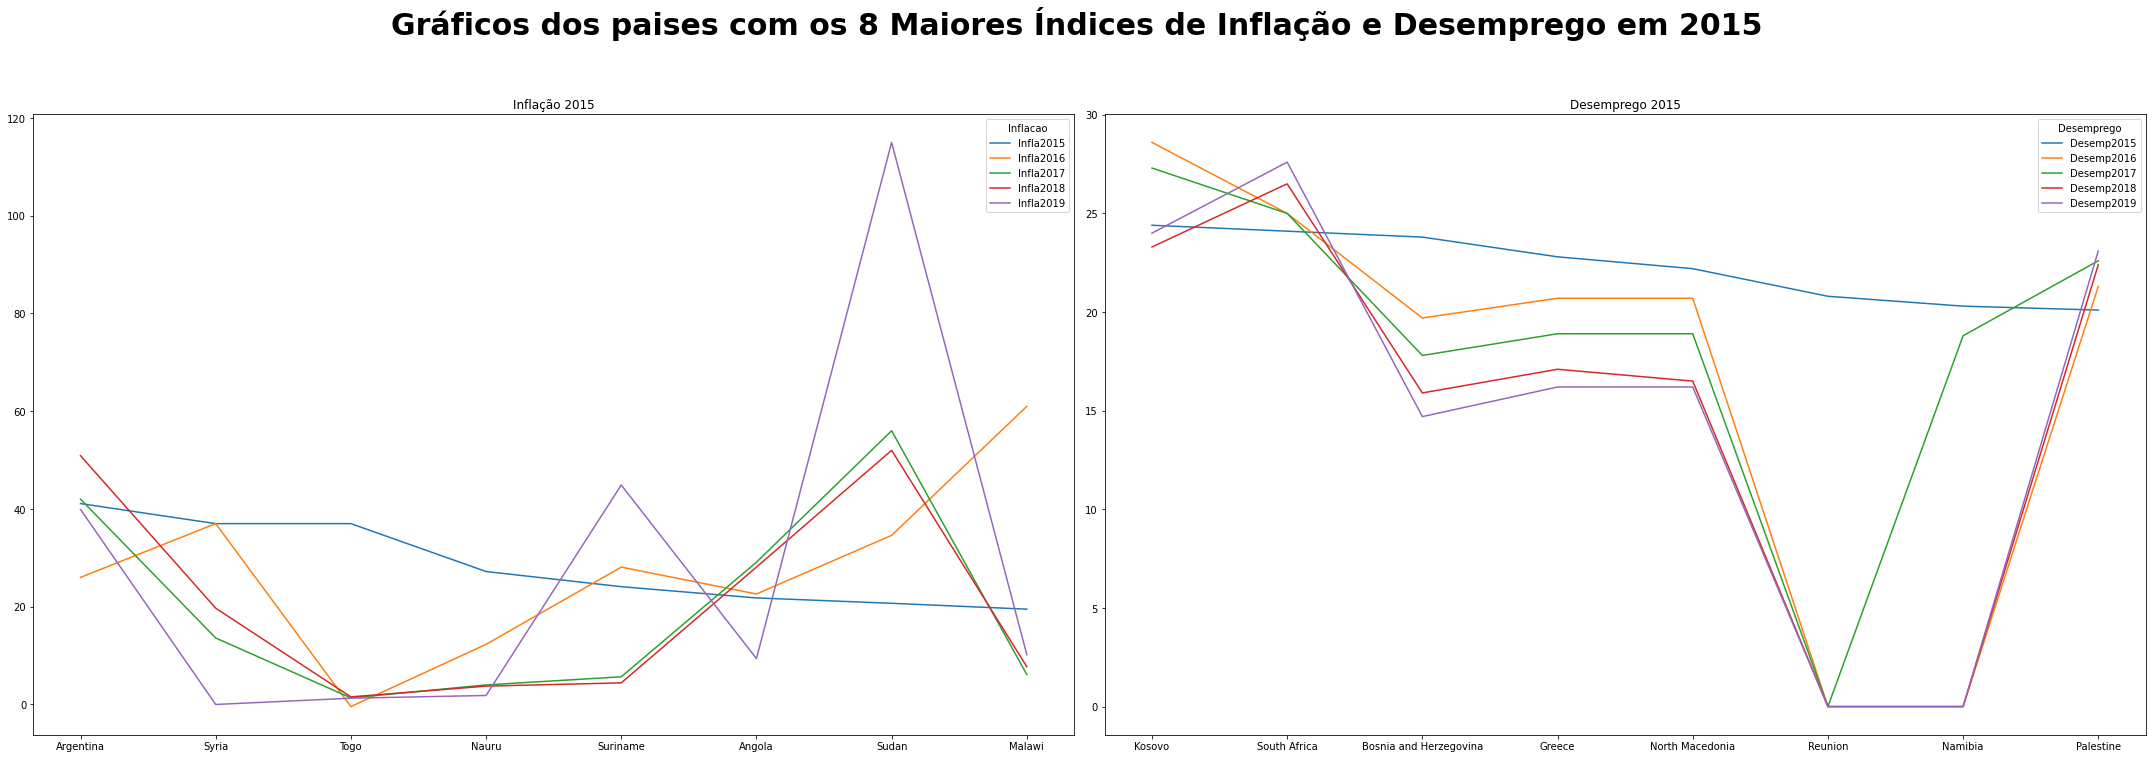

In [48]:
#Criando 2 Gráficos ordenado os maiores valores de 2015 criado na etapa de filtro dos datasets
#usando o Matplotlib
x = MaiorInfla2015
y = MaiorDesemp2015
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos paises com os 8 Maiores Índices de Inflação e Desemprego em 2015', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao')
plt.title('Inflação 2015')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego')
plt.title('Desemprego 2015')

plt.tight_layout()
plt.show()

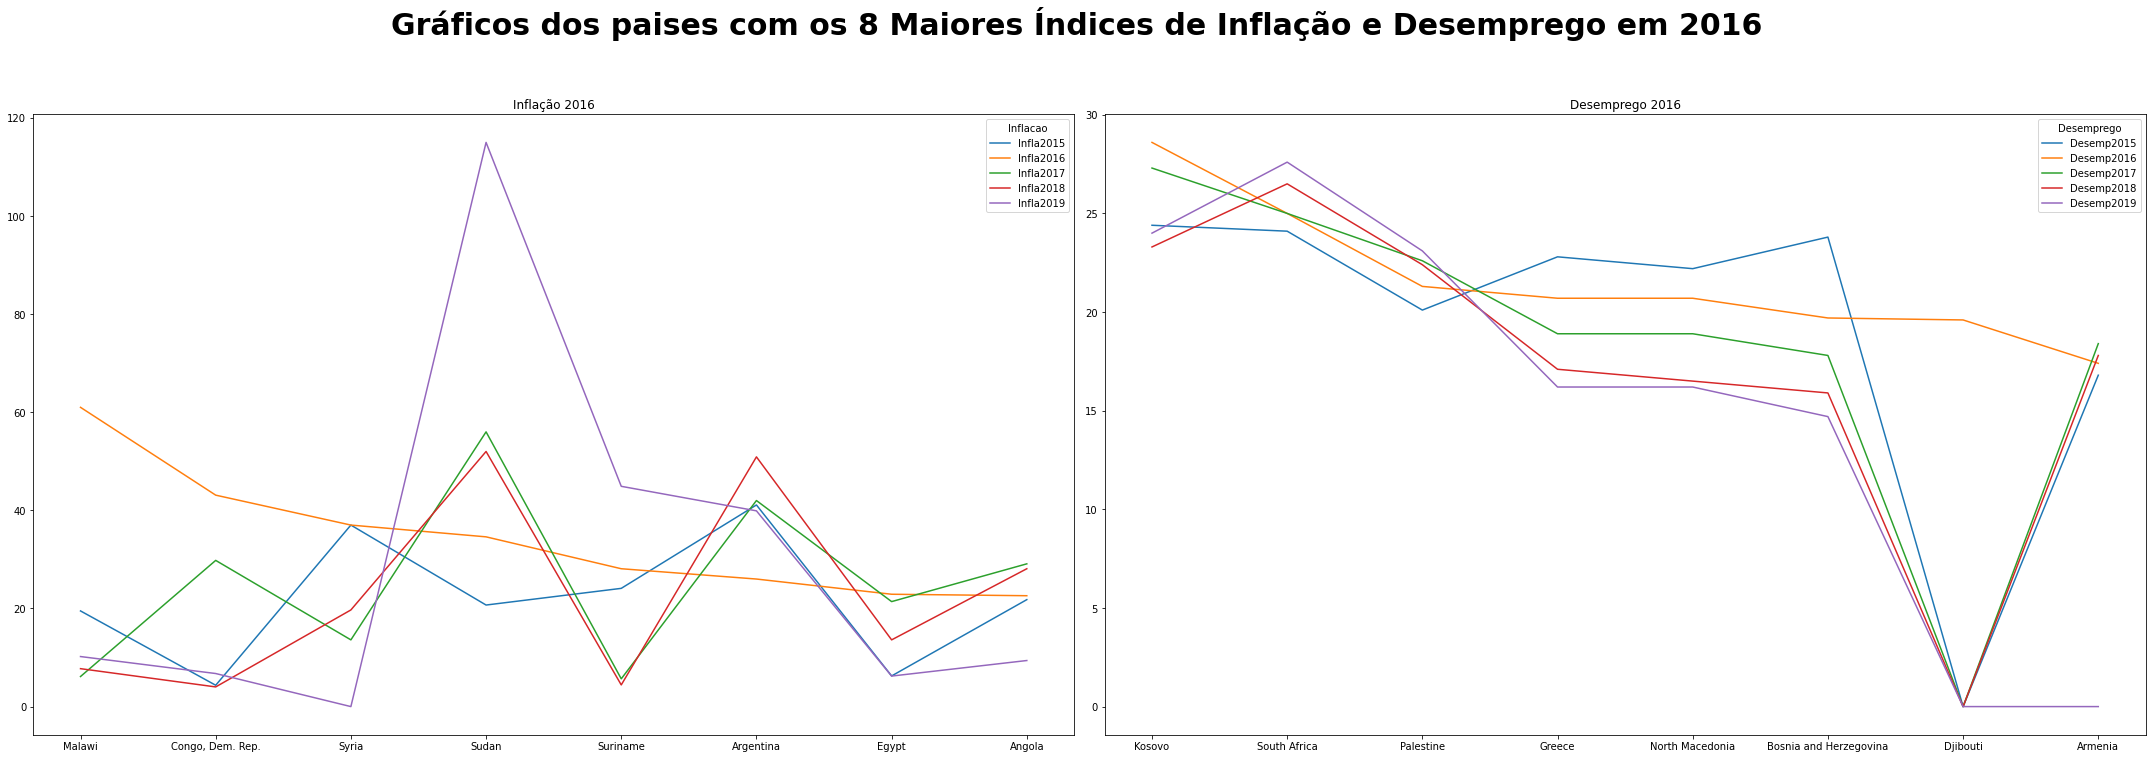

In [49]:
#Criando 2 Gráficos ordenado os maiores valores de 2016 criado na etapa de filtro dos datasets
#usando o Matplotlib
x = MaiorInfla2016
y = MaiorDesemp2016
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos paises com os 8 Maiores Índices de Inflação e Desemprego em 2016', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao')
plt.title('Inflação 2016')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego')
plt.title('Desemprego 2016')

plt.tight_layout()
plt.show()

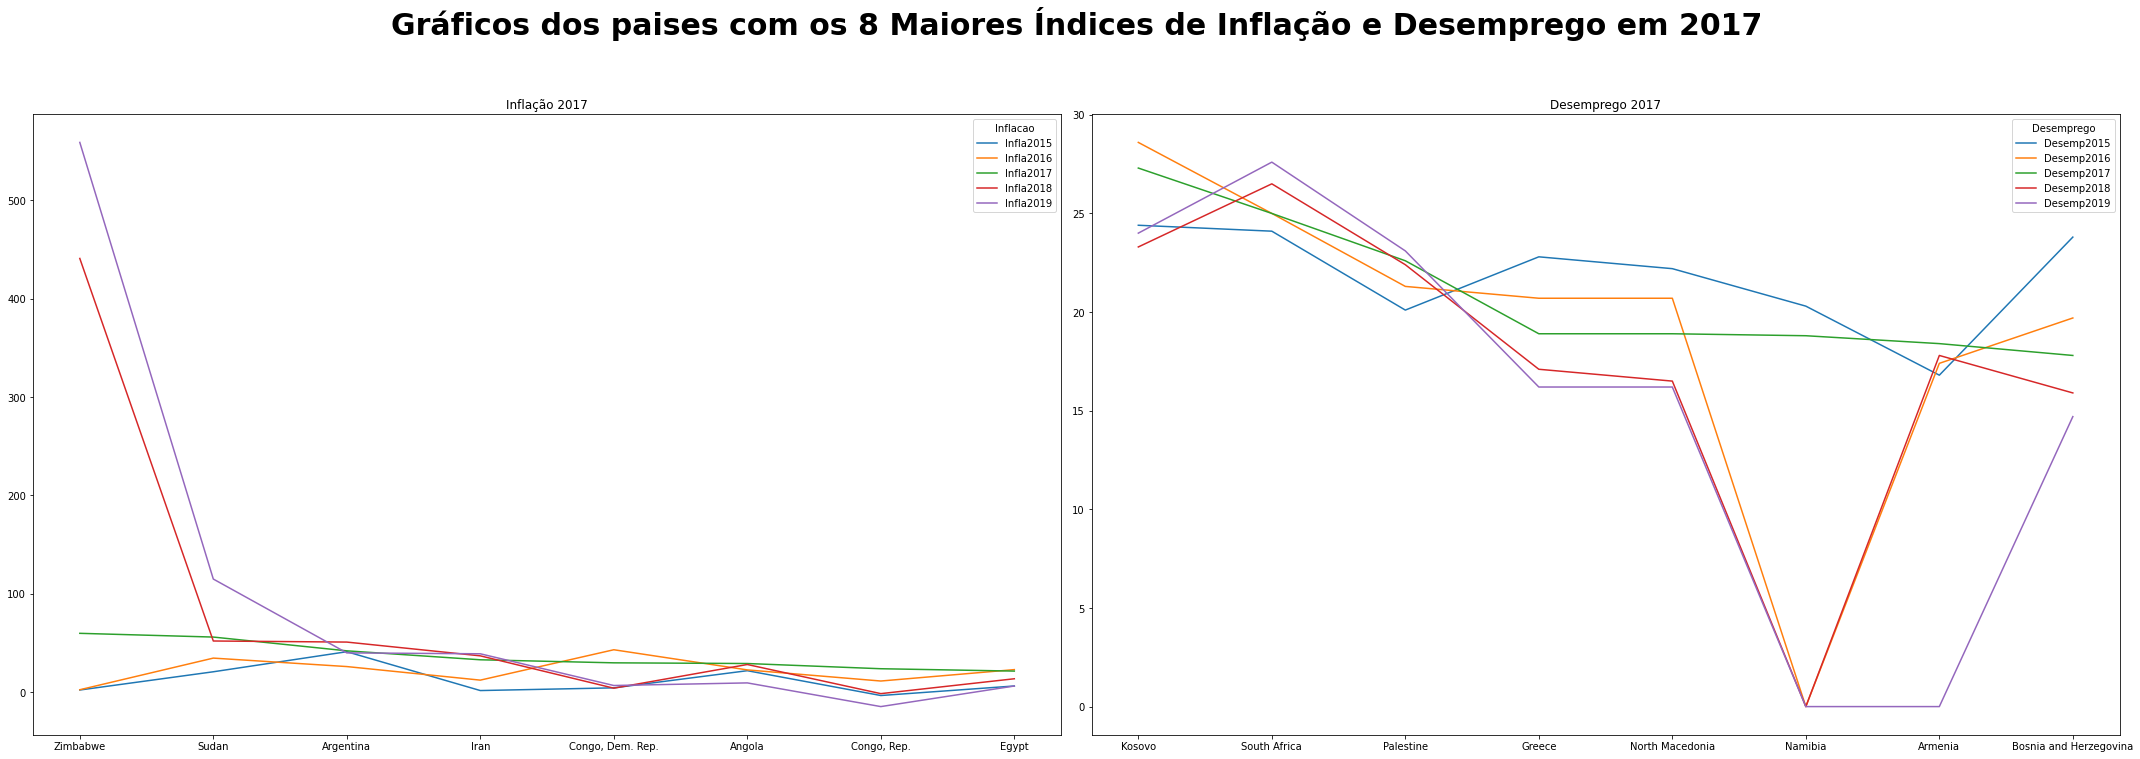

In [50]:
#Criando 2 Gráficos ordenado os maiores valores de 2017 criado na etapa de filtro dos datasets
#usando o Matplotlib
x = MaiorInfla2017
y = MaiorDesemp2017
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos paises com os 8 Maiores Índices de Inflação e Desemprego em 2017', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao')
plt.title('Inflação 2017')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego')
plt.title('Desemprego 2017')

plt.tight_layout()
plt.show()

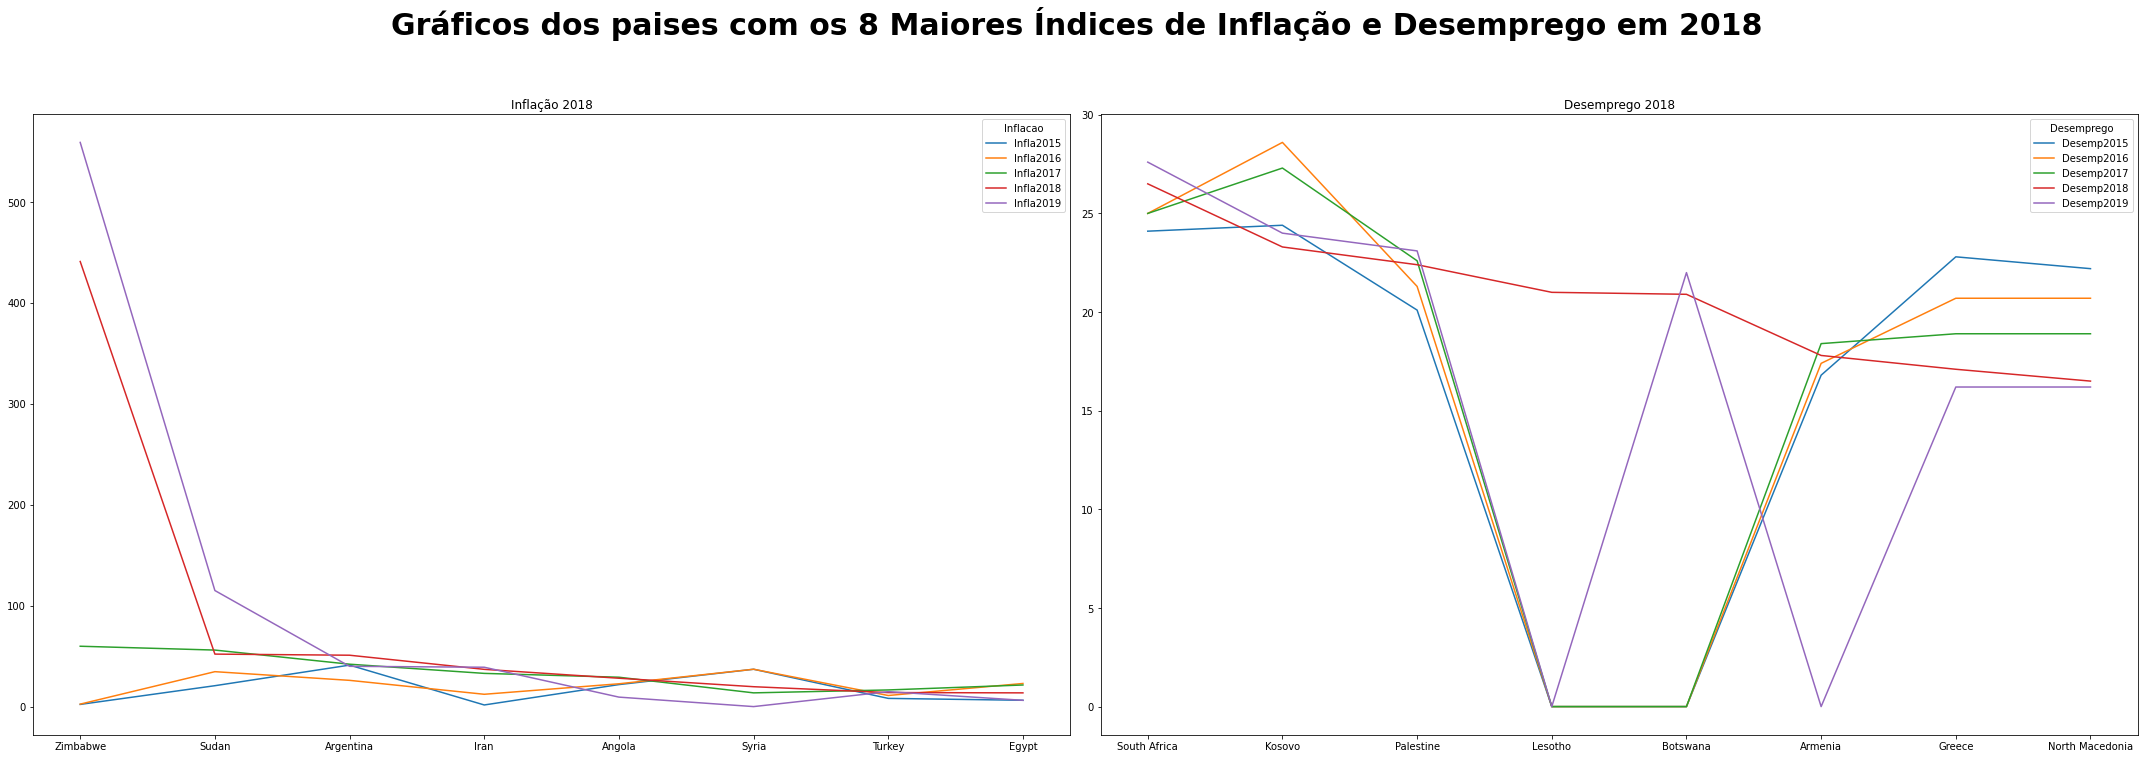

In [51]:
#Criando 2 Gráficos ordenado os maiores valores de 2018 criado na etapa de filtro dos datasets
#usando o Matplotlib
x = MaiorInfla2018
y = MaiorDesemp2018
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos paises com os 8 Maiores Índices de Inflação e Desemprego em 2018', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao')
plt.title('Inflação 2018')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego')
plt.title('Desemprego 2018')

plt.tight_layout()
plt.show()

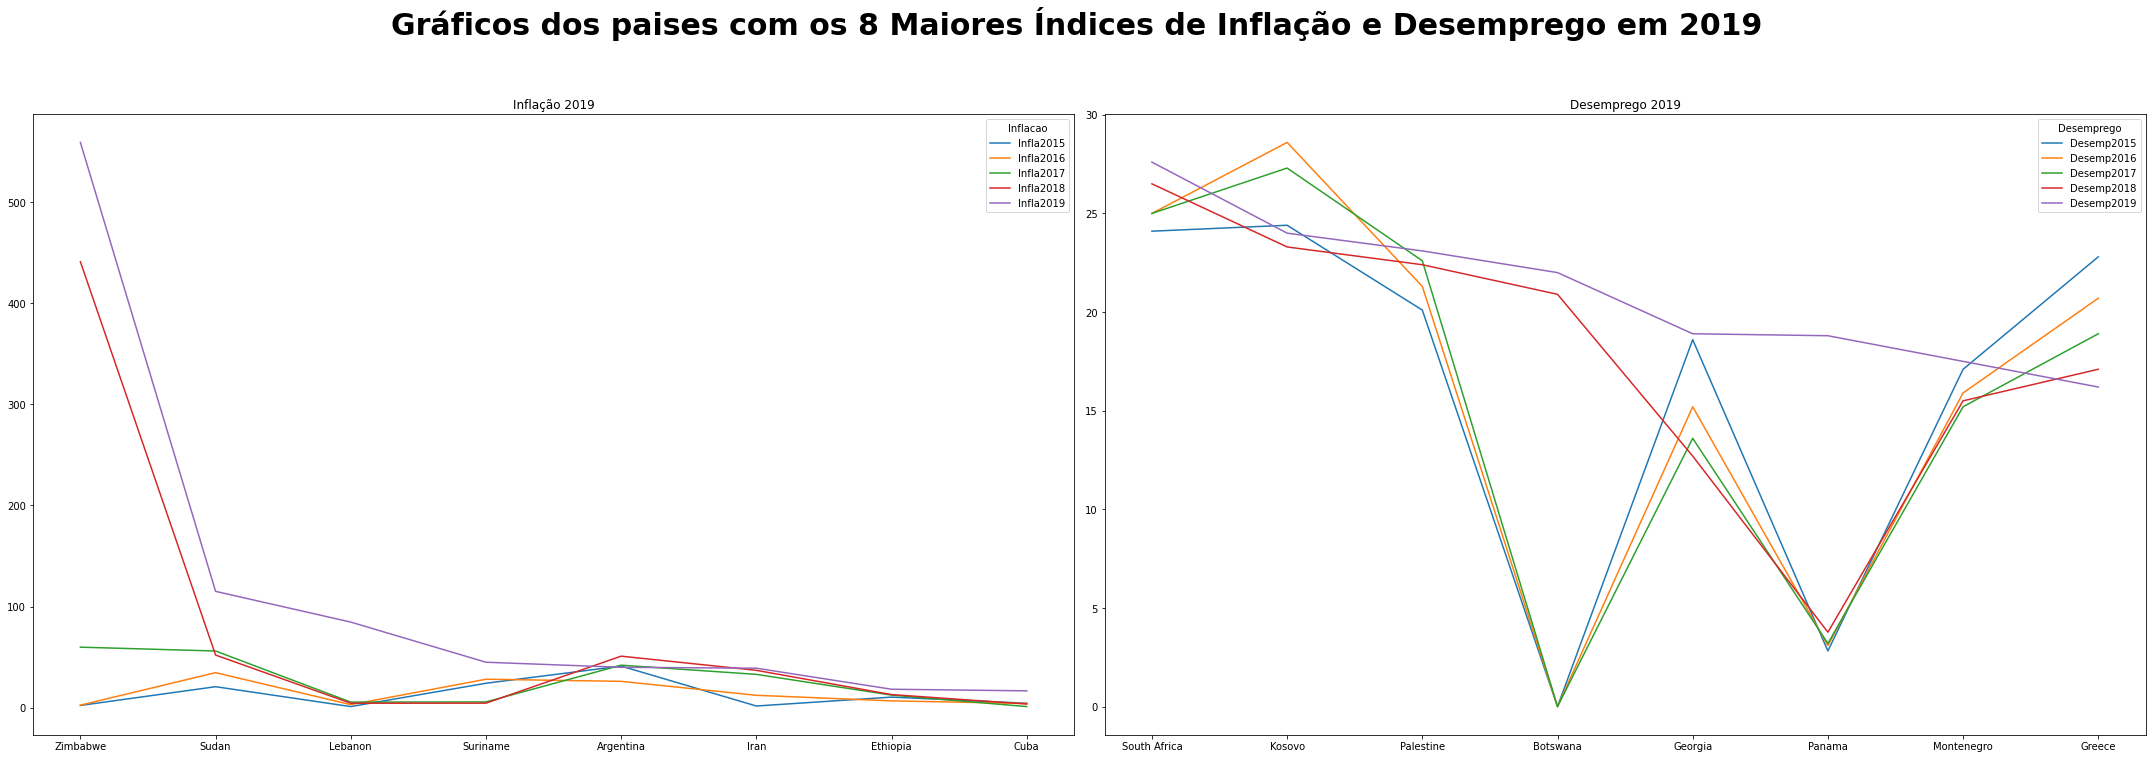

In [52]:
#Criando 2 Gráficos ordenado os maiores valores de 2019 criado na etapa de filtro dos datasets
#usando o Matplotlib
x = MaiorInfla2019
y = MaiorDesemp2019
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos paises com os 8 Maiores Índices de Inflação e Desemprego em 2019', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao')
plt.title('Inflação 2019')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego')
plt.title('Desemprego 2019')

plt.tight_layout()
plt.show()

In [53]:
#Criando um campo "Media inflação" e "Media Desemprego" em seus respectivos datasets e fazendo o calculo da
#media de cada Pais de 2015 à 2019
Desem['Media Desemprego'] = Desem.mean(axis = 1)
Infl['Media Inflação'] = Infl.mean(axis = 1)

<ipython-input-53-792e45073d20>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Desem['Media Desemprego'] = Desem.mean(axis = 1)
<ipython-input-53-792e45073d20>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Infl['Media Inflação'] = Infl.mean(axis = 1)


In [54]:
#Criando um dataset que recebe os dois datasets de Desemprego e Inflação através de um merge pelo "Pais"
Media = Desem.merge(Infl, how='left', on='Pais')

In [55]:
# Pegando os 10 paises com maiores medias de desemprego no periodo de 2015-2019
MediaDesem = Media.nlargest(10, 'Media Desemprego')
MediaDesem = MediaDesem[["Pais","Media Desemprego", "Media Inflação"]]
MediaDesem.set_index('Pais', inplace = True)

In [56]:
# Pegando os 10 paises com maiores medias de Inflação no período de 2015-2019
MediaInfl = Media.nlargest(10, 'Media Inflação')
MediaInfl = MediaInfl[["Pais","Media Desemprego", "Media Inflação"]]
MediaInfl.set_index('Pais', inplace = True)

In [57]:
# Criando um dataset Media final, onde é feito o append das duas bases
MediaFinal = MediaDesem.append(MediaInfl)

<ipython-input-57-df52ff520352>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MediaFinal = MediaDesem.append(MediaInfl)


In [58]:
#Dataset de Inflação e Desemprego que recebem suas respectivas 10 maiores médias fazendo um comparativo
MediaGeralInf = MediaFinal.nlargest(10, 'Media Inflação')
MediaGeralDeseem = MediaFinal.nlargest(10, 'Media Desemprego')

In [59]:
# Mostrando como ficou o Dataset final com os dados filtrados com as medias de Inflação
MediaGeralInf

,Media Desemprego,Media Inflação
Pais,,
Zimbabwe,2.900,212.880
Sudan,0.000,55.660
Argentina,6.154,39.980
Iran,10.406,24.522
Angola,0.000,22.198
Syria,0.000,21.460
Suriname,1.050,21.436
Malawi,1.118,20.912
Lebanon,1.888,19.682


In [60]:
# Mostrando como ficou o Dataset final com os dados filtrados com as medias de Desemprego
MediaGeralDeseem

,Media Desemprego,Media Inflação
Pais,,
South Africa,25.64,5.2300
Kosovo,25.52,1.0124
Palestine,21.90,2.1276
Greece,19.14,-0.2098
North Macedonia,18.90,2.4416
Bosnia and Herzegovina,18.38,1.7406
Montenegro,16.24,2.7988
Georgia,15.80,5.5880
Spain,15.10,1.0546


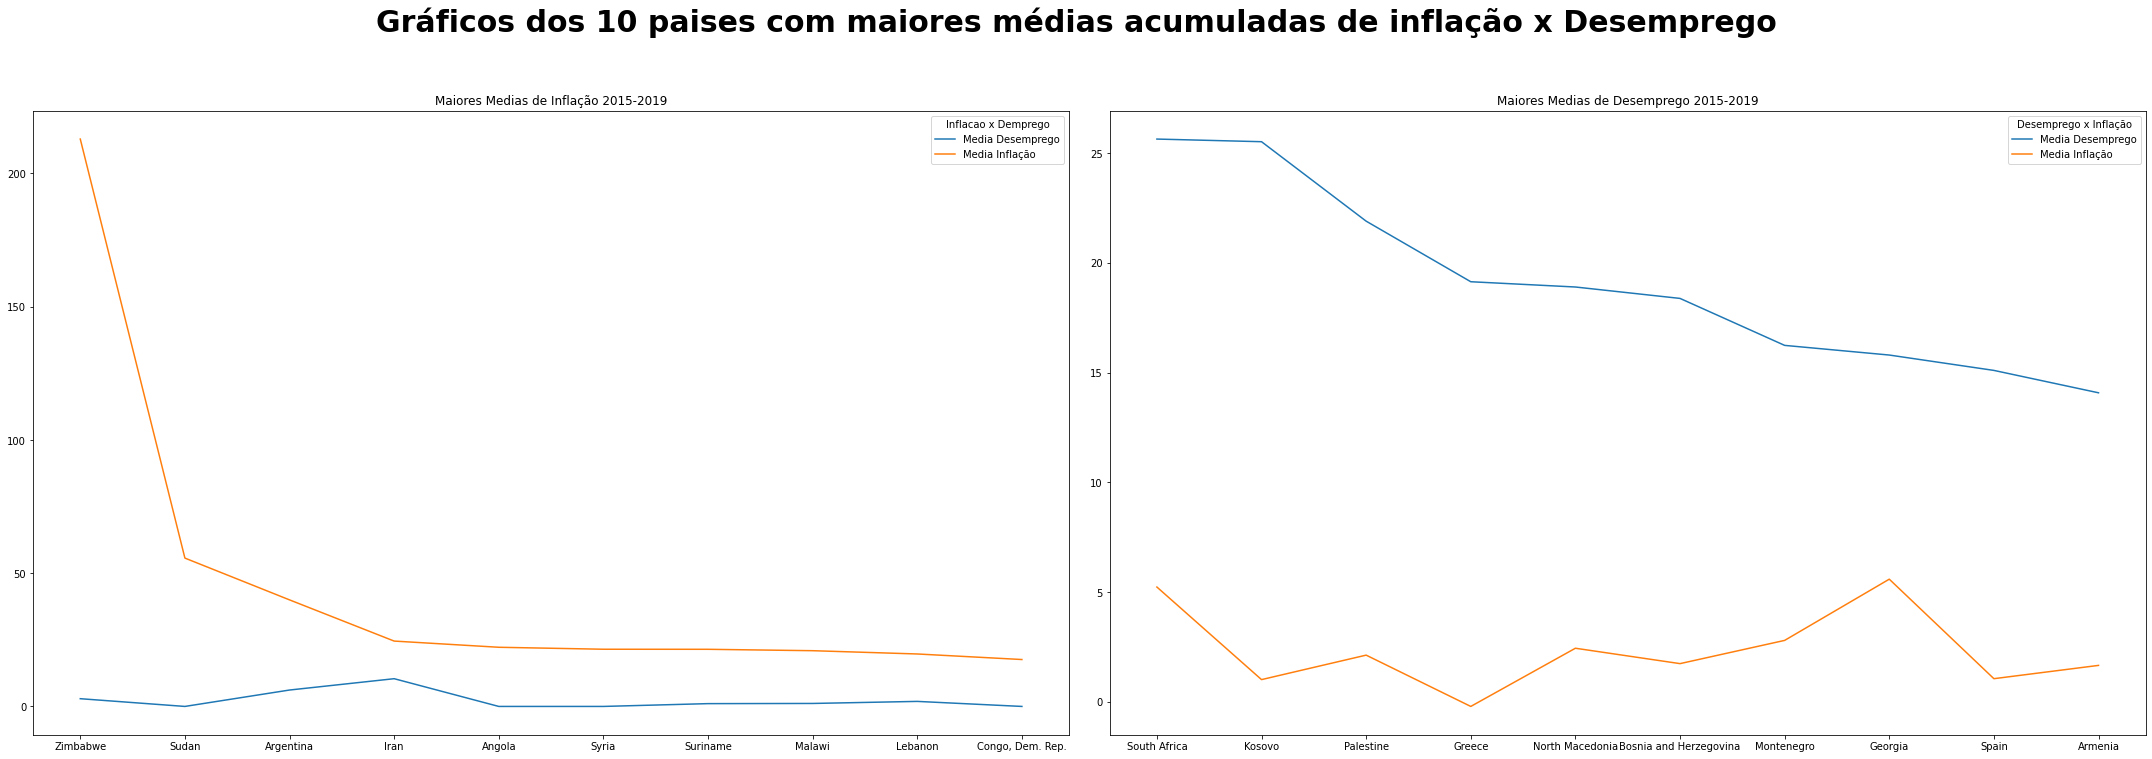

In [61]:
#Criação de dois gráficos alimentados com o Dataset das medias finais usando o Matplotlib
x = MediaGeralInf
y = MediaGeralDeseem
plt.figure(figsize=(30,10))

plt.suptitle('Gráficos dos 10 paises com maiores médias acumuladas de inflação x Desemprego', fontsize=30, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.legend(x, title = 'Inflacao x Demprego')
plt.title('Maiores Medias de Inflação 2015-2019')


plt.subplot(1, 2, 2)
plt.plot(y)
plt.legend(y, title = 'Desemprego x Inflação')
plt.title('Maiores Medias de Desemprego 2015-2019')

plt.tight_layout()
plt.show()